In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/PlantVillage.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten ,BatchNormalization,Dropout
import matplotlib.pyplot as plt

In [ ]:
pip show tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Fou

In [ ]:
pip show tensorflow


In [ ]:
dataset=keras.utils.image_dataset_from_directory(
    directory='/content/PlantVillage',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 2152 files belonging to 3 classes.


In [ ]:
# def process(image,label):
#   image=tf.cast(image/255,tf.float32)
#   return image,label

# dataset =  dataset.map(process)


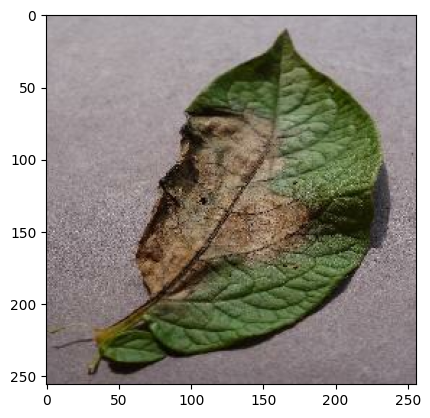

In [ ]:
for image_batch ,batch_label in dataset:
  first_image = image_batch[0].numpy().astype('uint8')
  plt.imshow(first_image)


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
def get_dataset_partition_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle_size=10000,shuffle=True):
  ds_size = len(ds)
  if shuffle:
    ds  = ds.shuffle(shuffle_size,seed=12)

  train_size= int(ds_size*train_split)
  val_size=int(ds_size*val_split)

  train_ds = ds.take(train_size)

  val_test_ds = ds.skip(train_size)

  val_ds = val_test_ds.take(val_size)
  test_ds = val_test_ds.skip(val_size)

  return train_ds,test_ds,val_ds


In [ ]:
train_ds,test_ds,val_ds=get_dataset_partition_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
Image_size=256
Batch_size=32
Channel=3
Epochs=50
input_shape=(Batch_size,Image_size,Image_size,Channel)

In [ ]:
resize_rescale = Sequential(
   [ layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1./255)]
)

In [ ]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
model = Sequential([resize_rescale,data_augmentation,
                    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
                    layers.MaxPooling2D((2,2)),

                    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                     layers.MaxPooling2D((2,2)),

                    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                     layers.MaxPooling2D((2,2)),

                    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                     layers.MaxPooling2D((2,2)),

                    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                     layers.MaxPooling2D((2,2)),

                    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                     layers.MaxPooling2D((2,2)),

                    layers.Flatten(),

                    layers.Dense(64,activation='relu'),
                    layers.Dense(3,activation='softmax')
                     ])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=50,batch_size=Batch_size,verbose=1,validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 18s 135ms/step - loss: 0.9196 - accuracy: 0.4748 - val_loss: 0.9043 - val_accuracy: 0.4583
Epoch 2/50
54/54 [==============================] - 7s 97ms/step - loss: 0.7933 - accuracy: 0.6086 - val_loss: 0.5341 - val_accuracy: 0.7917
Epoch 3/50
54/54 [==============================] - 7s 96ms/step - loss: 0.5473 - accuracy: 0.7668 - val_loss: 0.4416 - val_accuracy: 0.8229
Epoch 4/50
54/54 [==============================] - 7s 96ms/step - loss: 0.4803 - accuracy: 0.8116 - val_loss: 0.4338 - val_accuracy: 0.8125
Epoch 5/50
54/54 [==============================] - 8s 93ms/step - loss: 0.3763 - accuracy: 0.8468 - val_loss: 0.4001 - val_accuracy: 0.8125
Epoch 6/50
54/54 [==============================] - 10s 154ms/step - loss: 0.2878 - accuracy: 0.8791 - val_loss: 0.3038 - val_accuracy: 0.8854
Epoch 7/50
54/54 [==============================] - 7s 94ms/step - loss: 0.2375 - accuracy: 0.9120 - val_loss: 0.3158 - val_accuracy: 0.8802
Epoch 8/5

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 46ms/step - loss: 0.0849 - accuracy: 0.9688


In [ ]:
scores

[0.0849071517586708, 0.96875]

In [ ]:
print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 50, 'steps': 54}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
loss= history.history['loss']
val_loss=history.history['val_loss']

accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

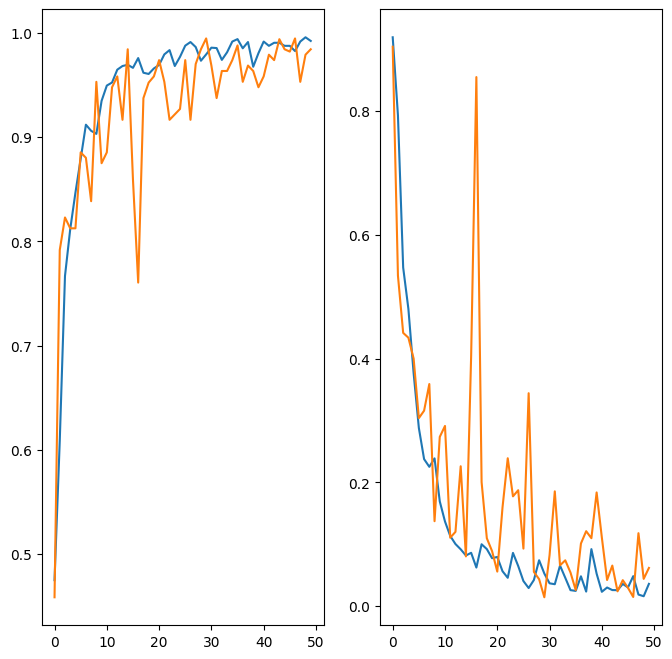

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),accuracy,label='Training Accuracy')
plt.plot(range(Epochs),val_accuracy,label='Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label='Training Loss')
plt.plot(range(Epochs),val_loss,label='Validation Loss')

First Image Predict
actual images label Potato___Late_blight
1/1 [==============================] - 0s 148ms/step
predicted image label Potato___Late_blight


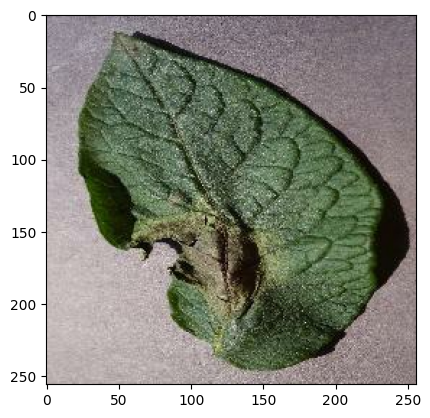

In [ ]:
import numpy as np
for image_batch , label_batch in train_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print('First Image Predict')
  plt.imshow(first_image)
  print('actual images label',class_names[first_label])

  batch_prediction = model.predict(image_batch)

  print('predicted image label',class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)

  prediction = model.predict(img_array)

  predicted_class = class_names[np.argmax(prediction[0])]
  confidence = round(100*(np.max(prediction[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 20ms/step


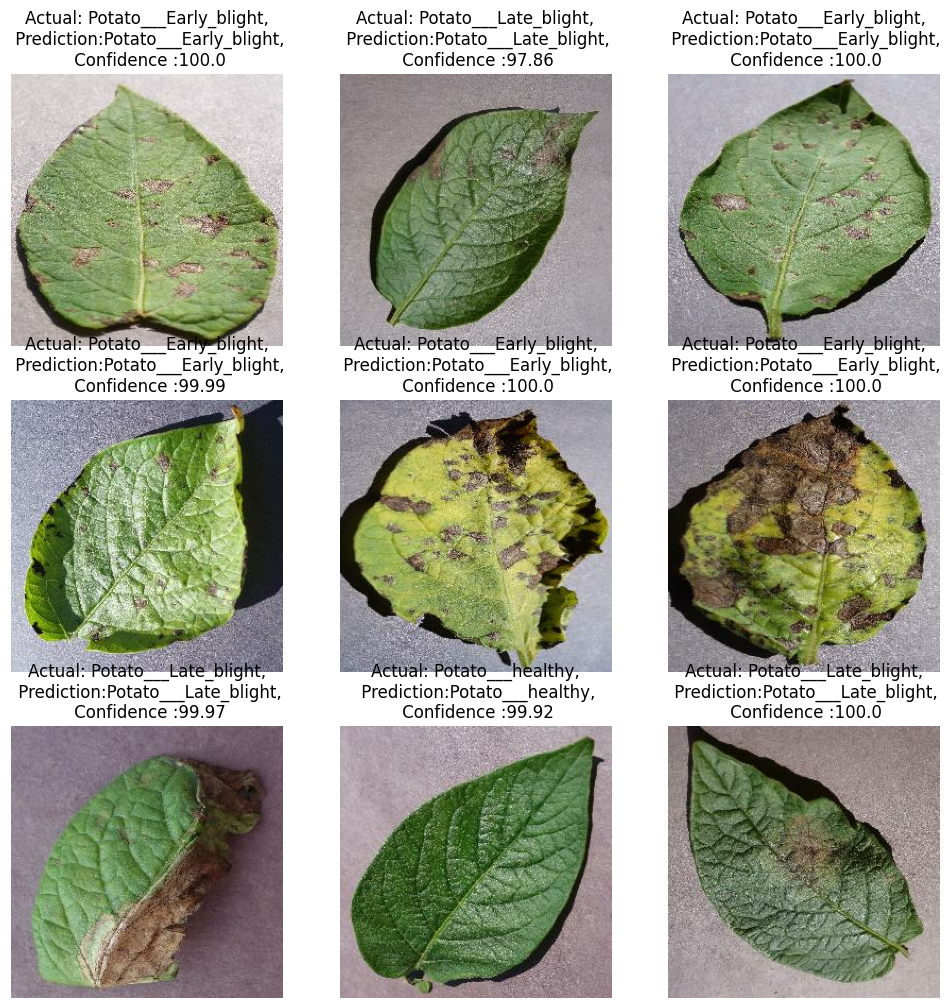

In [ ]:
plt.figure(figsize=(12,12))
for images , labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

    predicted_class,confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f'Actual: {actual_class},\n Prediction:{predicted_class},\n Confidence :{confidence}')


In [ ]:
model.save('potato_disease_prediction.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('potato_disease_prediction.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>